## RELAX DATA CHALLENGE

1) A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:

2) A usage summary table ( "takehome_user_engagement" ) that has a row for each day
that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .
We suggest spending 12
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.



In [766]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime as dt
import numpy as np

## Load Data <a id='1.3_Load Data'></a>

In [767]:
with open('takehome_users.csv') as f:
    print(f)
    #for text in f:
        #print(text)
with open('takehome_user_engagement.csv') as f:
    print(f)

<_io.TextIOWrapper name='takehome_users.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='takehome_user_engagement.csv' mode='r' encoding='UTF-8'>


In [768]:
engage_data = pd.read_csv ('takehome_user_engagement.csv', encoding= 'cp1252')

In [769]:
user_data = pd.read_csv ('takehome_users.csv', encoding= 'cp1252')

In [770]:
engage_data.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [771]:
user_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [772]:
user_data.describe()


,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [773]:
engage_data.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


I plan to merge the datasets but I should do some easy cleanups (ie. dropping duplicates, making sure the datasets have the same column names for same values, cleaning formats etc.)

In [774]:
print (engage_data.columns)


Index(['time_stamp', 'user_id', 'visited'], dtype='object')


In [775]:
engage_data.shape

(207917, 3)

In [776]:
engage_data.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [777]:
engage_data

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


## CLEANING

In [778]:
engage_data.duplicated(subset=['time_stamp', 'user_id']).any()

False

In [779]:
#dropping dublicates
engage_data.drop_duplicates(subset=['time_stamp', 'user_id', 'visited'], keep='last', inplace = True)


In [780]:
engage_data['user_id'].nunique()

8823

In [781]:
engage_data.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [782]:
engage_data['time_stamp'] = pd.to_datetime(engage_data['time_stamp'])


In [783]:
engage_data.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [784]:
engage_data.isna().value_counts()

time_stamp  user_id  visited
False       False    False      207917
dtype: int64

In [785]:
#moving to clean up user_data dataset.
user_data.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [786]:
user_data.rename(columns = {'object_id':'user_id'}, inplace = True)

In [787]:
user_data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [788]:
user_data.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [789]:
#converting creation_time to datetime
user_data['creation_time'] = pd.to_datetime(user_data['creation_time'])


In [790]:
user_data['invited_by_user_id'].nunique()

2564

In [791]:
# converting 'invited by user id' to integers like in the 'user_id' column
user_data['invited_by_user_id'] = user_data['invited_by_user_id'].astype('Int64')



In [792]:
user_data['invited_by_user_id'].head()

0    10803
1      316
2     1525
3     5151
4     5240
Name: invited_by_user_id, dtype: Int64

In [793]:
pd.DataFrame (user_data.isna().value_counts())

0
user_id creation_time name  email creation_source last_session_creation_time opted_in_to_mailing_list enabled_for_marketing_drip org_id invited_by_user_id      
False   False         False False False           False                      False                    False                      False  False               4776
                                                                                                                                        True                4047
                                                  True                       False                    False                      False  False               1641
                                                                                                                                        True                1536

In [794]:
user_data.last_session_creation_time.isna().value_counts()

False    8823
True     3177
Name: last_session_creation_time, dtype: int64

In [795]:
# I would fill in NaN values of last_session_creation_time with mean since there are a lot of NaN values.
#First let's convert the column to float to detect all nan values easily
user_data['last_session_creation_time'] = user_data['last_session_creation_time'].astype(float)



In [796]:
#finding the mean value.
user_data.last_session_creation_time.describe()

count    8.823000e+03
mean     1.379279e+09
std      1.953116e+07
min      1.338452e+09
25%      1.363195e+09
50%      1.382888e+09
75%      1.398443e+09
max      1.402067e+09
Name: last_session_creation_time, dtype: float64

In [797]:
user_data['last_session_creation_time']= user_data['last_session_creation_time'].fillna(1.379279e+09)
#checking if NaN are replaced with the mean.
user_data.last_session_creation_time.isna().any()

False

In [798]:
# suppressing scientific notation (iee+09)
user_data['last_session_creation_time'] = user_data['last_session_creation_time'].apply(lambda x: '%.f' % x)

In [799]:
#checking if there are other NaN values that are stated in other wordings
user_data.dtypes

user_id                                int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time            object
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                     Int64
dtype: object

In [800]:
# now converting the same column to datetime and the other object columns to string.
user_data['last_session_creation_time'] = pd.to_datetime(user_data['last_session_creation_time'], unit="s")
user_data.head()

user_data['name'] = user_data['name'].astype("string")
user_data['email'] = user_data['email'].astype("string")
user_data['creation_source'] = user_data['creation_source'].astype('string')

user_data.dtypes


user_id                                int64
creation_time                 datetime64[ns]
name                                  string
email                                 string
creation_source                       string
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                     Int64
dtype: object

In [801]:

user_data.isna().any()

user_id                       False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time    False
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
dtype: bool

 'Invited_by_user_id' still has NaN values but for obvious reasons. It would be wrong to take off all the rows with NaN values.However for our study  may be we need to engineer the data to make it more useful. Perhaps we should convert this column into two boolean columns to see if the users were invited or they did invite someone. These could be important features to predict if they would remain active. So I am adding those two columns and their values. And later I'll delete 'invited_by_user_id column.'

In [802]:
# filling NaN values with 0 for reference
user_data.invited_by_user_id = user_data.invited_by_user_id.fillna(0)
user_data.invited_by_user_id.isna().any()

False

In [803]:
#adding a column to verify if a user was invited
user_data['invited'] = user_data['invited_by_user_id'].apply(lambda x: 0 if x == 0 else 1)
#doublechecking if true/false column is correct
user_data.tail()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263,1
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074,1
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0,0
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,2014-01-26 08:57:12,0,1,0,0,0


In [804]:
user_data['user_id'].isin(user_data['invited_by_user_id']).value_counts()
    

        

False    9436
True     2564
Name: user_id, dtype: int64

2564 people were invited and 9436 people joined the site by themselves.

In [805]:
user_data['invited_by_user_id'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11995     True
11996     True
11997     True
11998     True
11999     True
Name: invited_by_user_id, Length: 12000, dtype: bool

Some users invited multiple users.

In [806]:
user_data['invited_by_user_id'].value_counts()
user_data['invited_by_user_id'].unique

<bound method Series.unique of 0        10803
1          316
2         1525
3         5151
4         5240
         ...  
11995     8263
11996        0
11997     8074
11998        0
11999        0
Name: invited_by_user_id, Length: 12000, dtype: Int64>

In [807]:
#changing the NaN value to 0
user_data['invited_by_user_id'] = user_data['invited_by_user_id'].fillna(0)
user_data['invited_by_user_id'].unique

<bound method Series.unique of 0        10803
1          316
2         1525
3         5151
4         5240
         ...  
11995     8263
11996        0
11997     8074
11998        0
11999        0
Name: invited_by_user_id, Length: 12000, dtype: Int64>

This must be an error because the dataset says that certain users invited themselves, which doesn't make sense. 
So I'll mark the invited_by_user_id column 0 for them as well.

Now let's add a boolean column 'invited' based on the values in 'invited_by_user_id'



In [808]:
# Adding 'invited' column
user_data['invited'] = user_data.apply(lambda x: 1 if x['invited_by_user_id'] != 0 
                                                  else 0 , axis=1)
user_data.tail()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263,1
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074,1
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0,0
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,2014-01-26 08:57:12,0,1,0,0,0


Moving to engage_data

In [809]:
# converting timestamp column to index on engage_data
engage_data.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [810]:
engage_data.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [811]:
engage_data.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [812]:
# aggregating the visits for each user 
engage_data = engage_data.groupby(['user_id','time_stamp']).agg({'visited':np.sum})

In [813]:
# resampling the data into 7 day period.
resample_data = engage_data.reset_index().groupby('user_id').resample('W',on='time_stamp').agg('sum')


In [814]:
#adding an active boolean column and adding values to it.
resample_data['active'] = 0

resample_data['active'] = resample_data.apply(lambda x: 1 if x['visited'] >= 3 else 0, axis = 1)


In [815]:
resample_data.columns

Index(['user_id', 'visited', 'active'], dtype='object')

In [816]:
resample_data.sort_values('visited', ascending = False)

user_id  visited  active
user_id time_stamp                          
5830    2014-02-23    40810        7       1
2013    2014-05-18    14091        7       1
5830    2014-01-19    40810        7       1
        2014-01-12    40810        7       1
        2013-11-03    40810        7       1
...                     ...      ...     ...
3112    2013-02-10        0        0       0
        2013-02-03        0        0       0
        2013-01-27        0        0       0
8704    2014-05-11        0        0       0
7813    2013-09-01        0        0       0

[82282 rows x 3 columns]

In [817]:
#taking off user_id index which is confusing:

resample_data.rename(columns={'user_id':'wrong_id'},inplace=True)
resample_data = resample_data.reset_index().drop('wrong_id',axis=1)
resample_data.head()

,user_id,time_stamp,visited,active
0,1,2014-04-27,1,0
1,2,2013-11-17,1,0
2,2,2013-11-24,0,0
3,2,2013-12-01,1,0
4,2,2013-12-08,0,0


In [818]:
# keeping only active user rows to merge with the user_data dataframe
engage_data = resample_data[resample_data['visited']>= 3]
engage_data.head()

,user_id,time_stamp,visited,active
13,2,2014-02-09,3,1
33,10,2013-03-03,3,1
39,10,2013-04-14,3,1
41,10,2013-04-28,3,1
42,10,2013-05-05,4,1


In [819]:
engage_data.sort_index (ascending = True)

,user_id,time_stamp,visited,active
13,2,2014-02-09,3,1
33,10,2013-03-03,3,1
39,10,2013-04-14,3,1
41,10,2013-04-28,3,1
42,10,2013-05-05,4,1
...,...,...,...,...
82257,11988,2014-04-06,3,1
82261,11988,2014-05-04,4,1
82263,11988,2014-05-18,3,1
82264,11988,2014-05-25,5,1


Now I'll create a column called total visits for all users to have an additional column in our predictions.

In [820]:
resample_data.sort_index (ascending = True)

,user_id,time_stamp,visited,active
0,1,2014-04-27,1,0
1,2,2013-11-17,1,0
2,2,2013-11-24,0,0
3,2,2013-12-01,1,0
4,2,2013-12-08,0,0
...,...,...,...,...
82277,11996,2013-09-08,1,0
82278,11997,2013-01-20,1,0
82279,11998,2014-04-27,1,0
82280,11999,2012-06-03,1,0


In [821]:
visit_data = resample_data.groupby(["user_id"]).sum()
visit_data['weekly_ave_visit'] = resample_data.groupby(["user_id"]).mean()['visited']
visit_data['weekly_ave_visit'] = round (visit_data['weekly_ave_visit'],1)
visit_data.head()


,visited,active,weekly_ave_visit
user_id,,,
1,1,0,1.0
2,14,1,0.7
3,1,0,1.0
4,1,0,1.0
5,1,0,1.0


In [822]:
visit_data = visit_data.reset_index()

In [823]:
visit_data.head()

,user_id,visited,active,weekly_ave_visit
0,1,1,0,1.0
1,2,14,1,0.7
2,3,1,0,1.0
3,4,1,0,1.0
4,5,1,0,1.0


In [824]:
weekly_visits = visit_data.drop(columns = ['visited', 'active'])
weekly_visits.head()

,user_id,weekly_ave_visit
0,1,1.0
1,2,0.7
2,3,1.0
3,4,1.0
4,5,1.0


In [825]:
weekly_visits['user_id'].nunique()

8823

In [826]:
# now adding 'active' column based on engage_data table
user_data['active'] = np.where(user_data['user_id'].isin(engage_data['user_id']) , 1, 0)
user_data.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,1,0


In [827]:
# adding total visits of users from total_visits dataframe
user_merged= pd.merge(user_data, weekly_visits, on = 'user_id', how = 'outer')
user_merged.head()


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active,weekly_ave_visit
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,1,0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,1,0.7
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,1,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,1,0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,1,0,1.0


In [828]:
user_merged.isna().any()

user_id                       False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time    False
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id            False
invited                       False
active                        False
weekly_ave_visit               True
dtype: bool

In [829]:
#dropping user rows with no visit data for a better prediction model
user_merged = user_merged.dropna()


## EDA

In [830]:
user_merged.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active,weekly_ave_visit
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,1,0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,1,0.7
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,1,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,1,0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,1,0,1.0


In [831]:
user_merged.shape

(8823, 13)

Let's find the percentages of the active users and plot them.

In [832]:
active_counts = user_merged['active'].value_counts()
active_counts

0    7378
1    1445
Name: active, dtype: int64

In [833]:
type(active_counts)

pandas.core.series.Series

In [834]:
active_percentages = pd.Series([(x / user_merged.shape[0]) * 100.00 for x in active_counts])
active_percentages

0    83.622351
1    16.377649
dtype: float64

In [835]:
len(user_merged[user_merged['active'] == 1])

1445

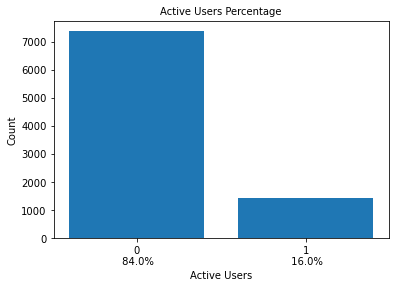

In [836]:
fig, ax = plt.subplots()
ax.bar(active_counts.index, active_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(active_percentages.index.astype(str) + '\n' + ' ' +
                  active_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Active Users')
ax.set_title('Active Users Percentage',
              fontsize = 10)
plt.show()

Only 12 percent wanted to stay an active user. Let's see which features might be helpful.

<AxesSubplot:>

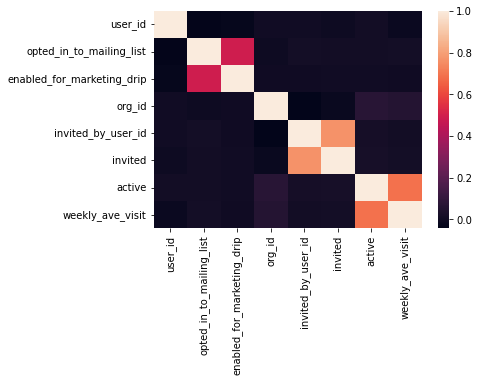

In [837]:
sns.heatmap(user_merged.corr())

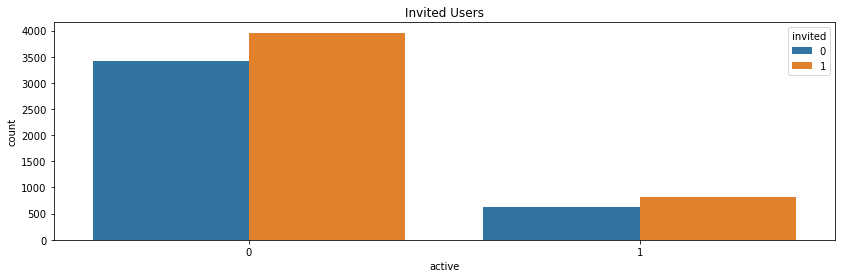

In [838]:
f, ax = plt.subplots(figsize=(14, 4))
sns.countplot(x="active", hue= 'invited', data=user_merged).set_title('Invited Users');

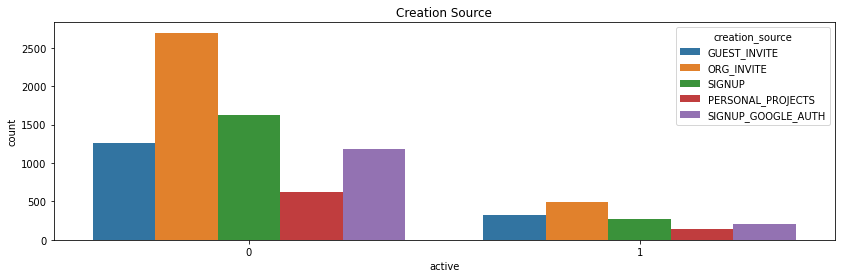

In [839]:
f, ax = plt.subplots(figsize=(14, 4))
sns.countplot(x="active", hue= 'creation_source', data=user_merged).set_title('Creation Source');

Most of the active users were invited by their organizations. Second most influential group is the guests of the organizations.

<AxesSubplot:xlabel='user_id', ylabel='weekly_ave_visit'>

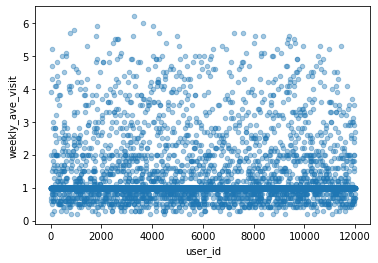

In [840]:
user_merged.plot.scatter(x = 'user_id', y = 'weekly_ave_visit', alpha = 0.4)

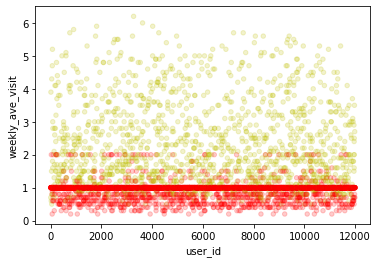

In [841]:
colors = np.where(user_merged["active"]== 1,'y','r')

user_merged.plot.scatter(x = 'user_id', y = 'weekly_ave_visit', s = 20, c = colors, alpha = 0.2)
plt.show()


In [842]:
visit_data[visit_data['active']== 1].weekly_ave_visit.nsmallest()

29      0.5
2239    0.5
2754    0.5
3347    0.5
6667    0.5
Name: weekly_ave_visit, dtype: float64

We can clearly see on the plot and later confirm with the code below that users who used it above 0.5 times or more per week remained active.

In [843]:
by_user_id_count = user_merged['invited_by_user_id'].value_counts()
by_user_id_count

0        4047
4612       10
11770       9
2308        9
6706        8
         ... 
5794        1
2911        1
7228        1
11702       1
5093        1
Name: invited_by_user_id, Length: 2230, dtype: Int64

<AxesSubplot:>

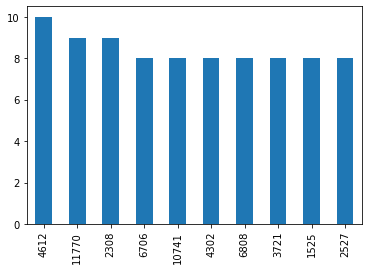

In [844]:
#top 10 most inviting users (taking off the 0 value which was a substitute for NaN)

by_user_id_count.iloc[1:11].plot(kind = 'bar')


In [845]:
#checking top 3 members

print ((user_merged [user_merged['user_id']== 4612]),(user_merged [user_merged['user_id']== 11770]), (user_merged [user_merged['user_id']== 2308]))

      user_id       creation_time           name                    email  \
4611     4612 2012-07-25 15:40:32  Corona Samuel  SamuelBCorona@gmail.com   

     creation_source last_session_creation_time  opted_in_to_mailing_list  \
4611    GUEST_INVITE        2014-05-27 15:40:32                         1   

      enabled_for_marketing_drip  org_id  invited_by_user_id  invited  active  \
4611                           1     128                4612        1       1   

      weekly_ave_visit  
4611               3.5          user_id       creation_time           name  \
11769    11770 2012-07-25 01:38:42  Barbosa Tiago   

                                 email creation_source  \
11769  TiagoGoncalvesBarbosa@yahoo.com          SIGNUP   

      last_session_creation_time  opted_in_to_mailing_list  \
11769        2012-07-27 01:38:42                         0   

       enabled_for_marketing_drip  org_id  invited_by_user_id  invited  \
11769                           0       5             

neither of the top ten inviters remained active users and almost half of them are invited with org_invite.

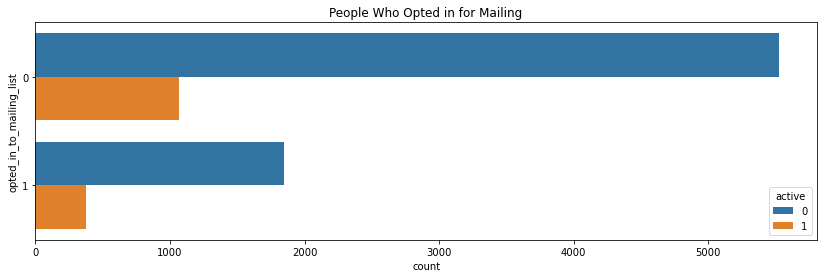

In [846]:

f, ax = plt.subplots(figsize=(14, 4))
sns.countplot(y="opted_in_to_mailing_list", hue='active', data=user_merged).set_title('People Who Opted in for Mailing');

People who opted into mailing list and are active have similar percentage with the whole group.

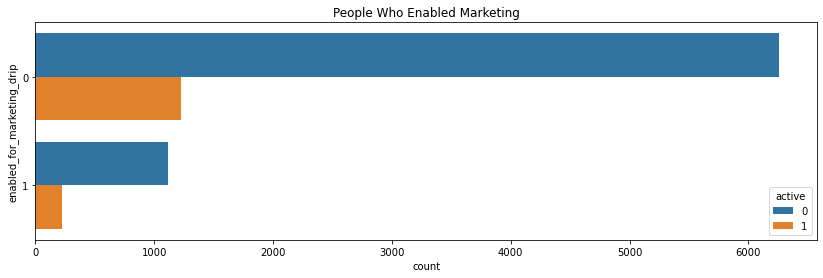

In [847]:
f, ax = plt.subplots(figsize=(14, 4))
sns.countplot(y='enabled_for_marketing_drip', hue='active', data=user_merged).set_title('People Who Enabled Marketing');

The percentage of active users in the mailing list seems to have also similar percentages

## SPLIT AND TRAIN DATA

In [848]:
df = user_merged
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active,weekly_ave_visit
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,1,0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,1,0.7
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,1,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,1,0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,1,0,1.0


In [849]:
df.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'invited',
       'active', 'weekly_ave_visit'],
      dtype='object')

In [850]:
cat_features = pd.get_dummies(df, columns=['creation_source'])
cat_features.head()

,user_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active,weekly_ave_visit,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803,1,0,1.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316,1,1,0.7,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525,1,0,1.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,0,0,1,5151,1,0,1.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,0,0,193,5240,1,0,1.0,1,0,0,0,0


In [851]:
#setting target column
target = cat_features['active']
#dropping unnecessary columns
df1 = cat_features.drop(['user_id', 'creation_time', 'name', 'email',
       'last_session_creation_time', 'org_id', 'invited_by_user_id'],axis=1)
df1.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,active,weekly_ave_visit,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,1,0,1.0,1,0,0,0,0
1,0,0,1,1,0.7,0,1,0,0,0
2,0,0,1,0,1.0,0,1,0,0,0
3,0,0,1,0,1.0,1,0,0,0,0
4,0,0,1,0,1.0,1,0,0,0,0


In [852]:
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler,QuantileTransformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import model_selection
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report


In [853]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_df, columns= df1.columns)
scaled_df.columns



Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited',
       'active', 'weekly_ave_visit', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [854]:
len(scaled_df) * .8, len(scaled_df) * .2

(7058.400000000001, 1764.6000000000001)

In [855]:
# splitting into test and train data
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop (columns='active'),
                                                  target, test_size=0.2, 
                                                    random_state=47)


In [856]:
X_train.shape, X_test.shape

((7058, 9), (1765, 9))

In [857]:
#compare models with a formula

start_time = dt.now()
random = RandomForestClassifier(n_estimators=1000)
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
score1 = random.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score1))

Running time: 0:00:02.135022 and Score 0.9592067988668556


In [858]:
start_time = dt.now()
logistic = LogisticRegression()
log_result = logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
score4= logistic.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score4 ))

Running time: 0:00:00.022267 and Score 0.9382436260623229


In [859]:
start_time = dt.now()

gradient = GradientBoostingClassifier()
gradient.fit(X_train,y_train)
y_pred = gradient.predict(X_test)
score5= gradient.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score5 ))

Running time: 0:00:00.194630 and Score 0.9643059490084985


In [860]:
start_time = dt.now()
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)
y_pred = decision.predict(X_test)
score2= decision.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score2 ))

Running time: 0:00:00.005740 and Score 0.9552407932011332


Random Forest and Gradient Boosting are contenders but I'll  pick RF because it gives more options.

In [861]:
print(cross_val_score(random, X_test,np.ravel(y_test),cv=5))
print('Mean of CVs:',np.mean(cross_val_score(gradient, X_test,np.ravel(y_test),cv=5)))

[0.95467422 0.94617564 0.95750708 0.95467422 0.95750708]
Mean of CVs: 0.9592067988668556


In [862]:
confusion_matrix = confusion_matrix(y_test.tolist(), y_pred.tolist())
print(confusion_matrix)

[[1442   21]
 [  58  244]]


1442 true positive predictions, 244 true negative predictions and 79 false predictions in total. 

In [863]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1463
           1       0.92      0.81      0.86       302

    accuracy                           0.96      1765
   macro avg       0.94      0.90      0.92      1765
weighted avg       0.95      0.96      0.95      1765



In [865]:
from sklearn.feature_selection import RFE

#Using RFE to pick the most important 5 features

rfe = RFE(random, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Print the selected features
print(rfe.support_)

[ True  True False  True  True  True False False False]


In [868]:
random.feature_importances_

array([0.0053733 , 0.00527284, 0.00100242, 0.98148599, 0.00214447,
       0.00111035, 0.00114944, 0.00135997, 0.00110122])

In [874]:
features_df = scaled_df.drop(columns = 'active')
features_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,weekly_ave_visit,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.721514,-0.423356,0.920523,-0.264373,2.134489,-0.752163,-0.307897,-0.523526,-0.431516
1,-0.580884,-0.423356,0.920523,-0.674697,-0.468496,1.329498,-0.307897,-0.523526,-0.431516
2,-0.580884,-0.423356,0.920523,-0.264373,-0.468496,1.329498,-0.307897,-0.523526,-0.431516
3,-0.580884,-0.423356,0.920523,-0.264373,2.134489,-0.752163,-0.307897,-0.523526,-0.431516
4,-0.580884,-0.423356,0.920523,-0.264373,2.134489,-0.752163,-0.307897,-0.523526,-0.431516


<AxesSubplot:>

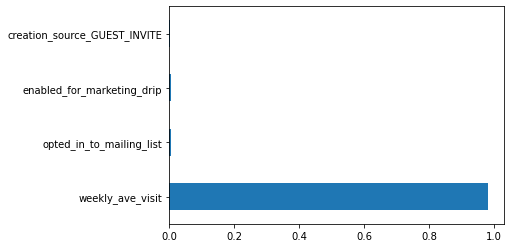

In [879]:
feat_importances = pd.Series(random.feature_importances_, index=features_df.columns)
feat_importances.nlargest(4).plot(kind='barh')

In [877]:
from sklearn.inspection import permutation_importance
r = permutation_importance(random, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean
perm['AVG_Importance']

opted_in_to_mailing_list             -0.001303
enabled_for_marketing_drip           -0.001020
invited                               0.000623
weekly_ave_visit                      0.239830
creation_source_GUEST_INVITE         -0.001190
creation_source_ORG_INVITE            0.000283
creation_source_PERSONAL_PROJECTS    -0.000340
creation_source_SIGNUP               -0.000567
creation_source_SIGNUP_GOOGLE_AUTH   -0.001133
Name: AVG_Importance, dtype: float64

Unfortunately weekly_ave_visit column overweigh way much and makes this prediction inefficient.This is the biggest problem I have with these datasets, the features that we have don't seem enough to come up with an accurate prediction and when I add a feature like weekly average visits, it dominates the other features. At this point, I'd ask for more data before going forward. Please see my report on the pdf file.